In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.utils import np_utils
from keras.models import load_model

Using TensorFlow backend.


In [10]:
digit = pd.read_csv('dataset/28_28.csv')
print(digit.shape)

(2000, 785)


In [6]:
x_data = digit.drop('0', axis=1)
y_data = digit['0']
print(x_data.shape)
print(y_data.shape)

(2000, 784)
(2000,)


In [7]:
x_data = x_data.values
y_data = y_data.values
print(x_data.shape)
print(y_data.shape)

(2000, 784)
(2000,)


In [8]:
x_data_4d = x_data.reshape(len(x_data), 28, 28, 1)
x_data_normalize = x_data_4d / 255
print(x_data_normalize.shape)

(2000, 28, 28, 1)


In [9]:
y_data_onehot = np_utils.to_categorical(y_data)
print(y_data_onehot.shape)

(2000, 10)


In [11]:
model = load_model('model/mnist_lenet.h5')
scores = model.evaluate(x_data_normalize, y_data_onehot)
print(scores)

2000/2000 [==============================] - 2s 800us/step
[5.282821481630206, 0.2075]


In [19]:
def plot_images_labels_prediction(images, labels, prediction, idx, num):
    fig = plt.gcf()
    fig.set_size_inches(15, 400)
    for i in range(num):
        ax = plt.subplot(200, 10, 1 + i)
        ax.imshow(images[idx])
        l = labels[idx]
        p = prediction[idx]
        title = 'Label: %s\nPredict: %s' % (l, p)
        ax.set_title(title, fontsize = 12)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

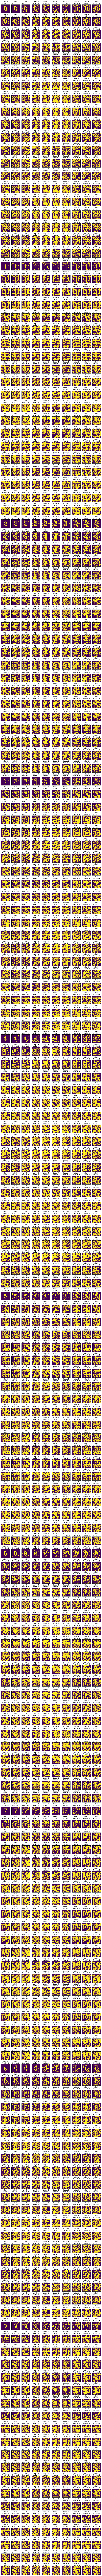

In [20]:
prediction = model.predict_classes(x_data_normalize)
x_data = x_data.reshape(len(x_data), 28, 28)
plot_images_labels_prediction(x_data, y_data, prediction, 0, 2000)